# Задача 1

Рассмотрим задачу классификации рукописных цифт на наборе данных MNIST (http://yann.lecun.com/exdb/mnist/).
Одним из подходов к её решению является мультиномиальная логистическая регрессия, которую требуется реализовать и обучить методом градиентного спуска.

# Шаг 1

Скачайте данные (https://s3.amazonaws.com/img-datasets/mnist.npz) и поместите их в удобную директорию с путём path. Загрузите данные при помощи кода ниже: 

In [9]:
import numpy as np
path = '~/ogaltsov/Downloads/' # пример
with np.load(path + '/mnist.npz', allow_pickle=True) as f:
    x_train, y_train = f['x_train'], f['y_train']

Данные представляют из себя набор из 60К изображений 28х28 пикселей (x_train), где цвет каждого пикселя закодирован числом от 0 до 255. В наборе y_train указано какая цифра изображена в соответствующем x_train изображении.

In [4]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


Цифра: 3
Её изображение:


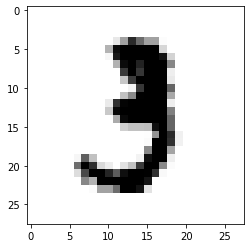

In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# возьмём 10е изображение из набора
idx = 10
img = x_train[idx, :, :]
digit = y_train[idx]
print('Цифра:', digit)
print('Её изображение:')
plt.imshow(img, cmap="Greys")
plt.show()

Таким образом, задача состоит в том, чтобы создать алгоритм, получающий на вход изображение, а на выходе предсказывающий цифру на изображении.

# Шаг 2

Для решения данной задачи мы будем использовать мультиномиальную логистическую регрессию (https://en.wikipedia.org/wiki/Multinomial_logistic_regression). Кратко принцип её работы можно резюмировать так:
1. На входе имеется набор n векторов-строк (60000 картинок) $x_{i}$ размерности k (k -- размер векторного представления картинки 28х28=784) и матрица параметров $w^{k x m}$ (где m -- число классов задачи, в нашем случае это 10 возможных цифр) <br>
<br>
2. Матрица параметров инициализируется случайно и обновляется в процессе оптимизации. Как обновлять веса?<br>
<br>
3. Идея в том, максимизировать логарифм вероятности истинного класса, который дан нам в обучающей выборке.<br>
<br>
4. Истинный класс картинки кодируется one-hot вектором $t$ размерности m, например, если на картинке изображена цифра 0, вектор t имеет вид $(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)$, если цифра 5 -- $(0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0)$<br>
<br>
5. Таким образом, нужно найти параметры, доставляющие минимум функции:<br>
<br>
$$\arg\min_{\hat{w}} \left[ -\frac{1}{n}\sum_{i = 1}^{n}\sum_{j = 1}^{m + 1} t_{nj}\log\left[\frac{\exp(-x_{n}{w_{j}})}{\sum_{l=1}^{m + 1}\exp(-x_{n}{w_{l}})}\right] \right],$$
где $t_{nj}$ -- j-ая компонента истинного класса n-й картинки, а $w_{j}$ -- это j-й столбец матрицы $w$

# Шаг 3

Порядок выполнения задачи:
1. Покажите, что оптимизируемая функция является выпуклой по параметрам $w$<br> 
<br> 
2. Найдите аналитическое выражение для градиента данной функции по параметрам $w$<br> 
<br> 
3. Реализуйте алгоритм градиентного спуска с постоянным шагом для данной функции<br> 
<br> 
4. Поставьте эксперимент на заданном наборе данных, используя библиотеку numpy: <br> 
    4.1 Представьте каждую из картинок x_train как вектор размера 784 <br> 
    4.2 Закодируйте каждый истинный класс из y_train вектором t <br> 
    4.3 Инициализируйте матрицу параметров случайными значениями <br> 
    4.4 Используя аналитическое выражение для градиента и процедуру градиентного спуска оптимизируйте параметры $w$ <br> 
    4.5 Постройте график зависимости значения функции от итерации оптимизации